#### Imports & Constants

In [20]:
import sys
import pathlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sys.path.append(pathlib.Path("..").resolve().as_posix())

from src.coder import TargetCoder

CLEANED_DATA_PATH = pathlib.Path("..") / "data" / "cleaned" / "cleaned_data.csv"
PROCESS_DATA_PATH = pathlib.Path("..") / "data" / "processed" / "processed_data.csv"

cleaned_df = pd.read_csv(CLEANED_DATA_PATH)
processed_df = pd.read_csv(PROCESS_DATA_PATH)

##### Sample

In [21]:
print(f"Cleaned data shape: {cleaned_df.shape}")
cleaned_df.head()

Cleaned data shape: (143613, 41)


,height_cm,weight_kg,preferred_foot,weak_foot,skill_moves,work_rate,pace,shooting,passing,dribbling,...,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,position
0,169,67,Left,3,4,Medium/Low,93.0,89.0,86.0,96.0,...,88,48,22,92,90,76,25,21,20,ST
1,185,80,Right,4,5,High/Low,93.0,93.0,81.0,91.0,...,93,63,24,91,81,85,22,31,23,LW
2,180,80,Left,2,4,High/Low,93.0,86.0,83.0,92.0,...,90,47,39,89,84,80,29,26,26,RW
3,195,95,Right,4,4,Medium/Low,76.0,91.0,81.0,86.0,...,88,84,20,86,83,91,25,41,27,ST
4,170,65,Right,4,4,High/Medium,75.0,72.0,89.0,91.0,...,75,58,68,87,93,71,57,57,56,CM


In [22]:
print(f"Processed data shape: {processed_df.shape}")
processed_df.head()

Processed data shape: (143613, 50)


,height_cm,weight_kg,weak_foot,skill_moves,pace,shooting,passing,dribbling,defending,physic,...,work_rate_High/Medium,work_rate_Low/High,work_rate_Low/Low,work_rate_Low/Medium,work_rate_Medium/High,work_rate_Medium/Low,work_rate_Medium/Medium,preferred_foot_Left,preferred_foot_Right,position
0,0.288462,0.295082,0.50,0.75,0.947368,0.9375,0.904110,1.000000,0.168831,0.553846,...,0,0,0,0,0,1,0,1,0,0
1,0.596154,0.508197,0.75,1.00,0.947368,0.9875,0.835616,0.932432,0.233766,0.800000,...,0,0,0,0,0,0,0,0,1,1
2,0.500000,0.508197,0.25,0.75,0.947368,0.9000,0.863014,0.945946,0.233766,0.569231,...,0,0,0,0,0,0,0,1,0,2
3,0.788462,0.754098,0.75,0.75,0.723684,0.9625,0.835616,0.864865,0.259740,0.907692,...,0,0,0,0,0,1,0,0,1,0
4,0.307692,0.262295,0.75,0.75,0.710526,0.7250,0.945205,0.932432,0.584416,0.553846,...,1,0,0,0,0,0,0,0,1,3


##### Height & Weight (Analysis & Visualization)

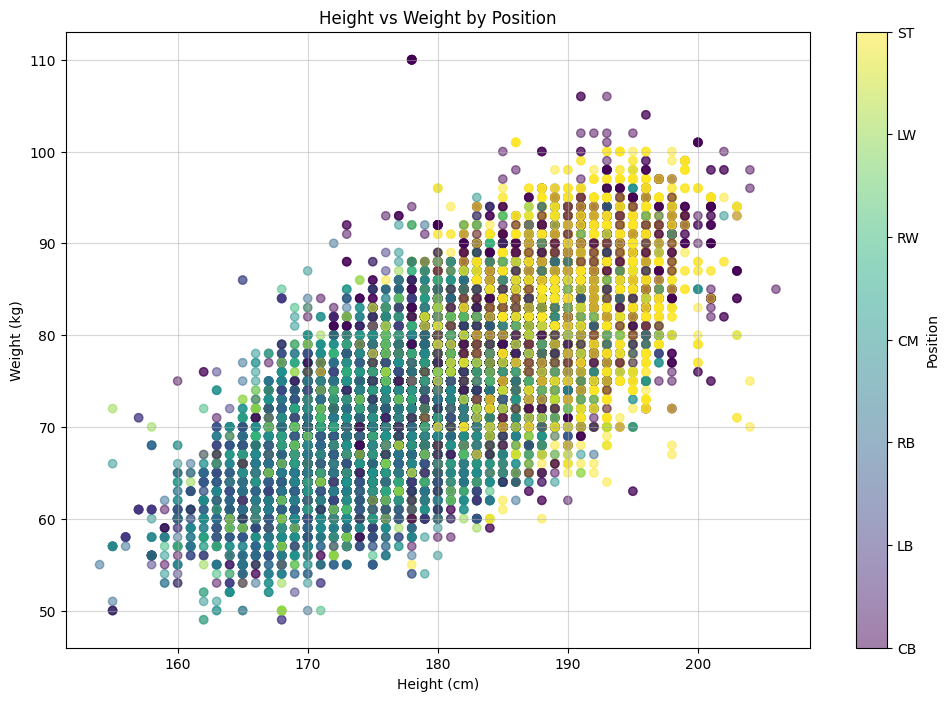

height_cm                      weight_kg                   
                mean       std  min  max       mean       std min  max
position                                                              
ST        182.194812  6.299667  155  206  76.587912  6.781214  50  110
LW        176.635306  5.499601  155  203  70.948917  5.618181  49   98
RW        176.609159  5.512537  154  197  70.837017  5.651693  49   94
CM        178.780590  5.873377  155  202  72.764211  5.891521  50   98
RB        178.544834  5.073628  155  195  72.861451  5.283999  49   94
LB        178.496811  5.169671  155  203  72.725446  5.437713  50   96
CB        186.239532  4.607951  162  204  79.613711  5.713018  53  101

In [23]:
def get_height_weight_statistics_df() -> pd.DataFrame:
    grouped_df: pd.DataFrame = cleaned_df.groupby('position')
    indexed_df: pd.DataFrame = grouped_df[["height_cm", "weight_kg"]]
    agg_df: pd.DataFrame = indexed_df.agg(["mean", "std", "min", "max"])
    # reindex positions to match TargetCoder._TARGET_DECODER
    agg_df = agg_df.reindex(TargetCoder._TARGET_DECODER.values())
    return agg_df
    
    
def scatterplot_height_weight_by_position() -> None:
    plt.figure(figsize=(12, 8))

    plt.scatter(
        cleaned_df["height_cm"],
        cleaned_df["weight_kg"],
        c=processed_df["position"],
        alpha=0.5,
        cmap="viridis",
    )

    plt.xlabel("Height (cm)")
    plt.ylabel("Weight (kg)")
    plt.title("Height vs Weight by Position")

    plt.grid(alpha=0.5)

    positions: list = cleaned_df["position"].unique().tolist()
    positions.sort(key=TargetCoder.encode, reverse=True)

    cbar = plt.colorbar(label="Position", ticks=range(len(positions)))
    cbar.set_ticklabels(positions)

    plt.show()

scatterplot_height_weight_by_position()
get_height_weight_statistics_df()

##### Preferred Foot (Analysis & Visualization)

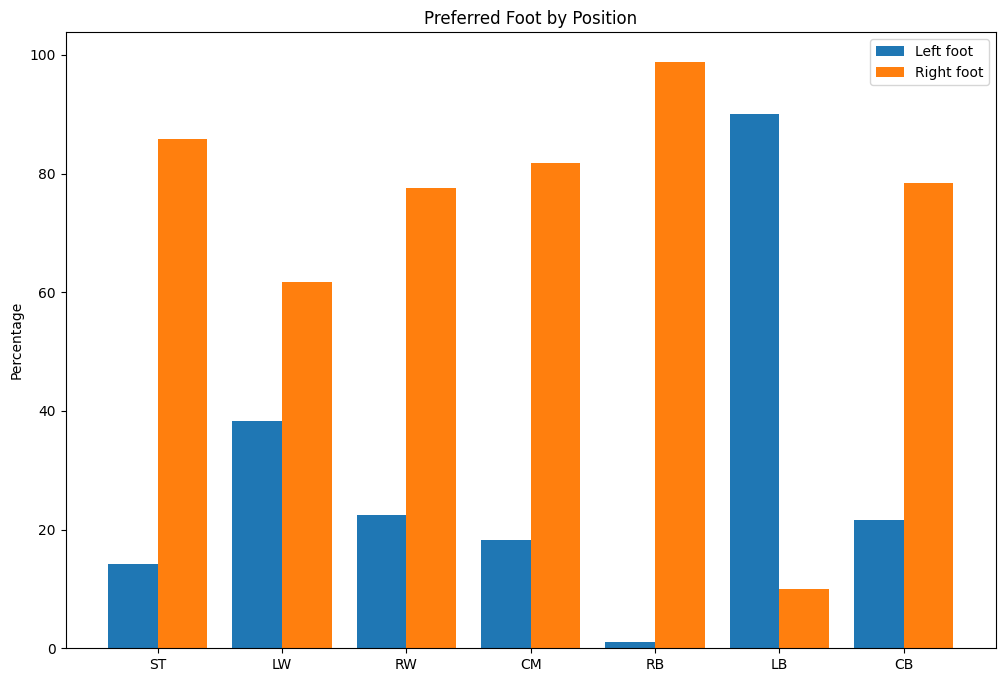

position,ST,LW,RW,CM,RB,LB,CB
preferred_foot,,,,,,,
Left,14.24,38.33,22.48,18.17,1.13,90.04,21.58
Right,85.76,61.67,77.52,81.83,98.87,9.96,78.42


In [24]:
def get_foot_crosstab() -> pd.DataFrame:
    # Create a crosstab of preferred_foot and position
    foot_crosstab = pd.crosstab(cleaned_df['preferred_foot'], cleaned_df['position'])
    # Divide each column by the sum of the column to get percentages
    foot_crosstab = foot_crosstab.div(foot_crosstab.sum(axis=0), axis=1) * 100
    # Round the percentages to two decimal places
    foot_crosstab = foot_crosstab.round(2)
    # reindex positions to match TargetCoder._TARGET_DECODER
    foot_crosstab = foot_crosstab.sort_index(axis=1, key=lambda x: x.map(TargetCoder.encode))
    return foot_crosstab

def visualize_foot_crosstab(foot_crosstab: pd.DataFrame) -> None:
    # plot the data
    positions = foot_crosstab.columns.tolist()
    x = np.arange(len(positions))
    _, ax = plt.subplots(figsize=(12, 8))
    
    # for each ax (position), plot the left and right foot percentages
    # left bar shift by 0.2 to the left, right bar shift by 0.2 to the right
    ax.bar(x - 0.2, foot_crosstab.loc['Left'], 0.4, label='Left foot')
    ax.bar(x + 0.2, foot_crosstab.loc['Right'], 0.4, label='Right foot')
    
    ax.set_xticks(x)
    ax.set_xticklabels(positions)
    ax.set_ylabel('Percentage')
    ax.set_title('Preferred Foot by Position')
    ax.legend()

    plt.show()

foot_crosstab = get_foot_crosstab()
visualize_foot_crosstab(foot_crosstab)
foot_crosstab

##### Weak Foot (Analysis & Visualization)

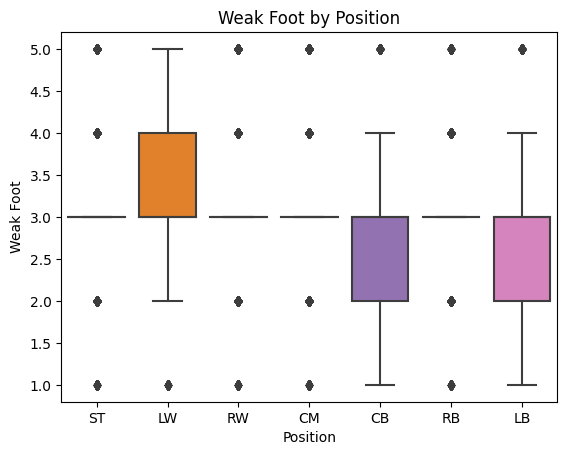

weak_foot                                             
          describe                                             
             count      mean       std  min  25%  50%  75%  max
position                                                       
ST         24172.0  3.101647  0.633660  1.0  3.0  3.0  3.0  5.0
LW         12372.0  3.155108  0.694991  1.0  3.0  3.0  4.0  5.0
RW         12578.0  3.123072  0.661621  1.0  3.0  3.0  3.0  5.0
CM         41762.0  3.081701  0.608073  1.0  3.0  3.0  3.0  5.0
RB         12602.0  2.921282  0.601160  1.0  3.0  3.0  3.0  5.0
LB         12544.0  2.782047  0.649798  1.0  2.0  3.0  3.0  5.0
CB         27583.0  2.776602  0.581212  1.0  2.0  3.0  3.0  5.0

In [25]:
def weak_foot_by_position_boxplot() -> None:
    sns.boxplot(
        x='position',
        y='weak_foot',
        data=cleaned_df
    )
    
    plt.xlabel('Position')
    plt.ylabel('Weak Foot')
    
    plt.title('Weak Foot by Position')
    plt.show()

def get_weak_foot_by_position_analysis() -> pd.DataFrame:
    grouped_df = cleaned_df.groupby('position')
    indexed_df = grouped_df[["weak_foot"]]
    agg_df = indexed_df.agg(["describe"])
    # reindex positions to match TargetCoder._TARGET_DECODER
    agg_df = agg_df.reindex(TargetCoder._TARGET_DECODER.values())
    return agg_df
    
    
weak_foot_by_position_boxplot()
analysis = get_weak_foot_by_position_analysis()
analysis

##### Skill Moves (Analysis & Visualization)

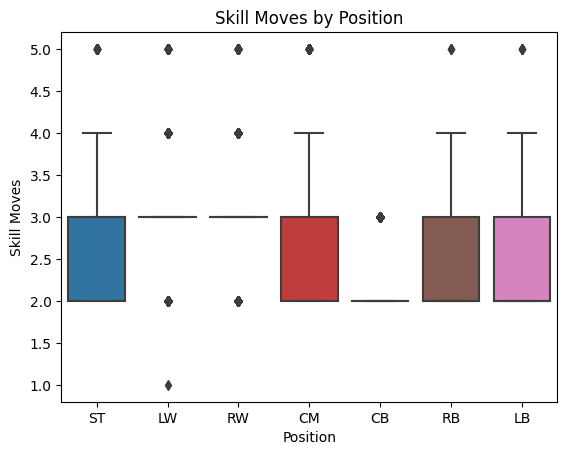

skill_moves                                             
            describe                                             
               count      mean       std  min  25%  50%  75%  max
position                                                         
ST           24172.0  2.617284  0.607024  2.0  2.0  3.0  3.0  5.0
LW           12372.0  2.972276  0.664923  1.0  3.0  3.0  3.0  5.0
RW           12578.0  2.936238  0.659296  2.0  3.0  3.0  3.0  5.0
CM           41762.0  2.575571  0.622103  2.0  2.0  3.0  3.0  5.0
RB           12602.0  2.298207  0.480832  2.0  2.0  2.0  3.0  5.0
LB           12544.0  2.330357  0.501532  2.0  2.0  2.0  3.0  5.0
CB           27583.0  2.022188  0.147296  2.0  2.0  2.0  2.0  3.0

In [26]:
def skill_moves_by_position_boxplot() -> None:
    sns.boxplot(
        x='position',
        y='skill_moves',
        data=cleaned_df
    )
    
    plt.xlabel('Position')
    plt.ylabel('Skill Moves')
    
    plt.title('Skill Moves by Position')
    plt.show()
    
def get_skill_moves_by_position_analysis() -> pd.DataFrame:
    grouped_df = cleaned_df.groupby('position')
    indexed_df = grouped_df[["skill_moves"]]
    agg_df = indexed_df.agg(["describe"])
    # reindex positions to match TargetCoder._TARGET_DECODER
    agg_df = agg_df.reindex(TargetCoder._TARGET_DECODER.values())
    return agg_df

skill_moves_by_position_boxplot()
analysis = get_skill_moves_by_position_analysis()
analysis